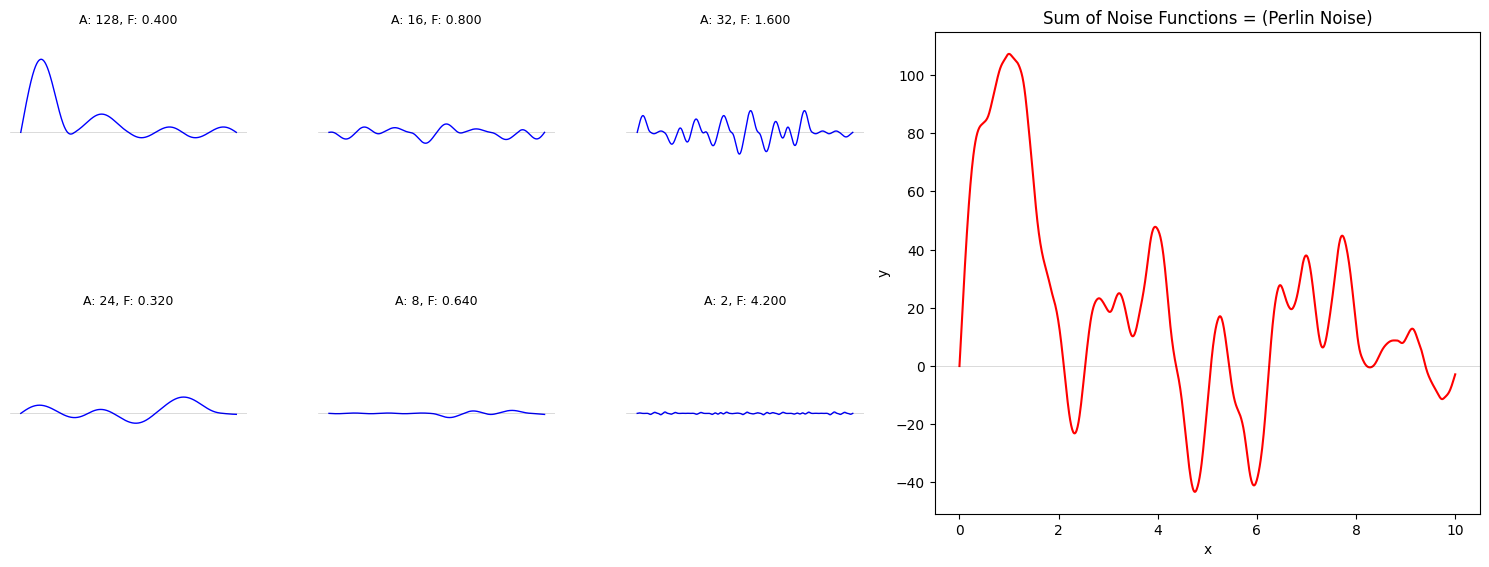

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise1
import matplotlib.gridspec as gridspec

# Параметры для каждого слоя шума (амплитуда и частота)
layers = [
    {'amplitude': 128, 'frequency': 0.4},
    {'amplitude': 16, 'frequency': 0.8},
    {'amplitude': 32, 'frequency': 1.6},
    {'amplitude': 24, 'frequency': 0.32},
    {'amplitude': 8, 'frequency': 0.64},
    {'amplitude': 2, 'frequency': 4.2}
]

# Находим максимальную амплитуду для установки общего масштаба Y
max_amplitude = max(layer['amplitude'] for layer in layers)
y_range = max_amplitude * 1.1  # Диапазон с небольшим запасом

# Генерация данных
x = np.linspace(0, 10, 1000)
all_y = []
total = np.zeros_like(x)

# Создаем фигуру с GridSpec для сетки 2x5
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, 5, figure=fig, width_ratios=[1, 1, 1, 1.5, 0.5], 
                      height_ratios=[1, 1])

# Создаем оси для отдельных шумов
ax0 = fig.add_subplot(gs[0, 0])  # Слой 1 (строка 0, столбец 0)
ax1 = fig.add_subplot(gs[0, 1])  # Слой 2 (строка 0, столбец 1)
ax2 = fig.add_subplot(gs[0, 2])  # Слой 3 (строка 0, столбец 2)
ax3 = fig.add_subplot(gs[1, 0])  # Слой 4 (строка 1, столбец 0)
ax4 = fig.add_subplot(gs[1, 1])  # Слой 5 (строка 1, столбец 1)
ax5 = fig.add_subplot(gs[1, 2])  # Слой 6 (строка 1, столбец 2)

# Создаем ось для суммы шумов (занимает столбцы 3-4 в обеих строках)
ax_sum = fig.add_subplot(gs[:, 3:5])

# Список всех осей для индивидуальных шумов
axes = [ax0, ax1, ax2, ax3, ax4, ax5]

# Генерация и отображение шумов
for i, (layer, ax) in enumerate(zip(layers, axes)):
    # Генерируем шум Перлина
    y = np.array([pnoise1(xi * layer['frequency'], octaves=1, base=i*10) 
                 for xi in x]) * layer['amplitude']
    all_y.append(y)
    total += y
    
    # Настройка графика индивидуального шума
    ax.plot(x, y, 'b', linewidth=1)
    ax.set_title(f'A: {layer["amplitude"]}, F: {layer["frequency"]:.3f}', fontsize=9)
    
    # Устанавливаем одинаковый диапазон Y для всех графиков
    ax.set_ylim(-y_range, y_range)
    
    # Добавляем горизонтальную линию в нуле для наглядности
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.2, linewidth=0.5)
    
    # Убираем оси и метки
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

# Настройка графика суммы
ax_sum.plot(x, total, 'r', linewidth=1.5)
ax_sum.set_title('Sum of Noise Functions = (Perlin Noise)', fontsize=12)
ax_sum.grid(False)
ax_sum.set_xlabel('x', fontsize=10)
ax_sum.set_ylabel('y', fontsize=10)

# Добавляем горизонтальную линию в нуле для графика суммы
ax_sum.axhline(y=0, color='k', linestyle='-', alpha=0.2, linewidth=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.4)
plt.savefig('perlin_noise_sum.png', dpi=300, bbox_inches='tight')
plt.show()